**Homework Part 1**

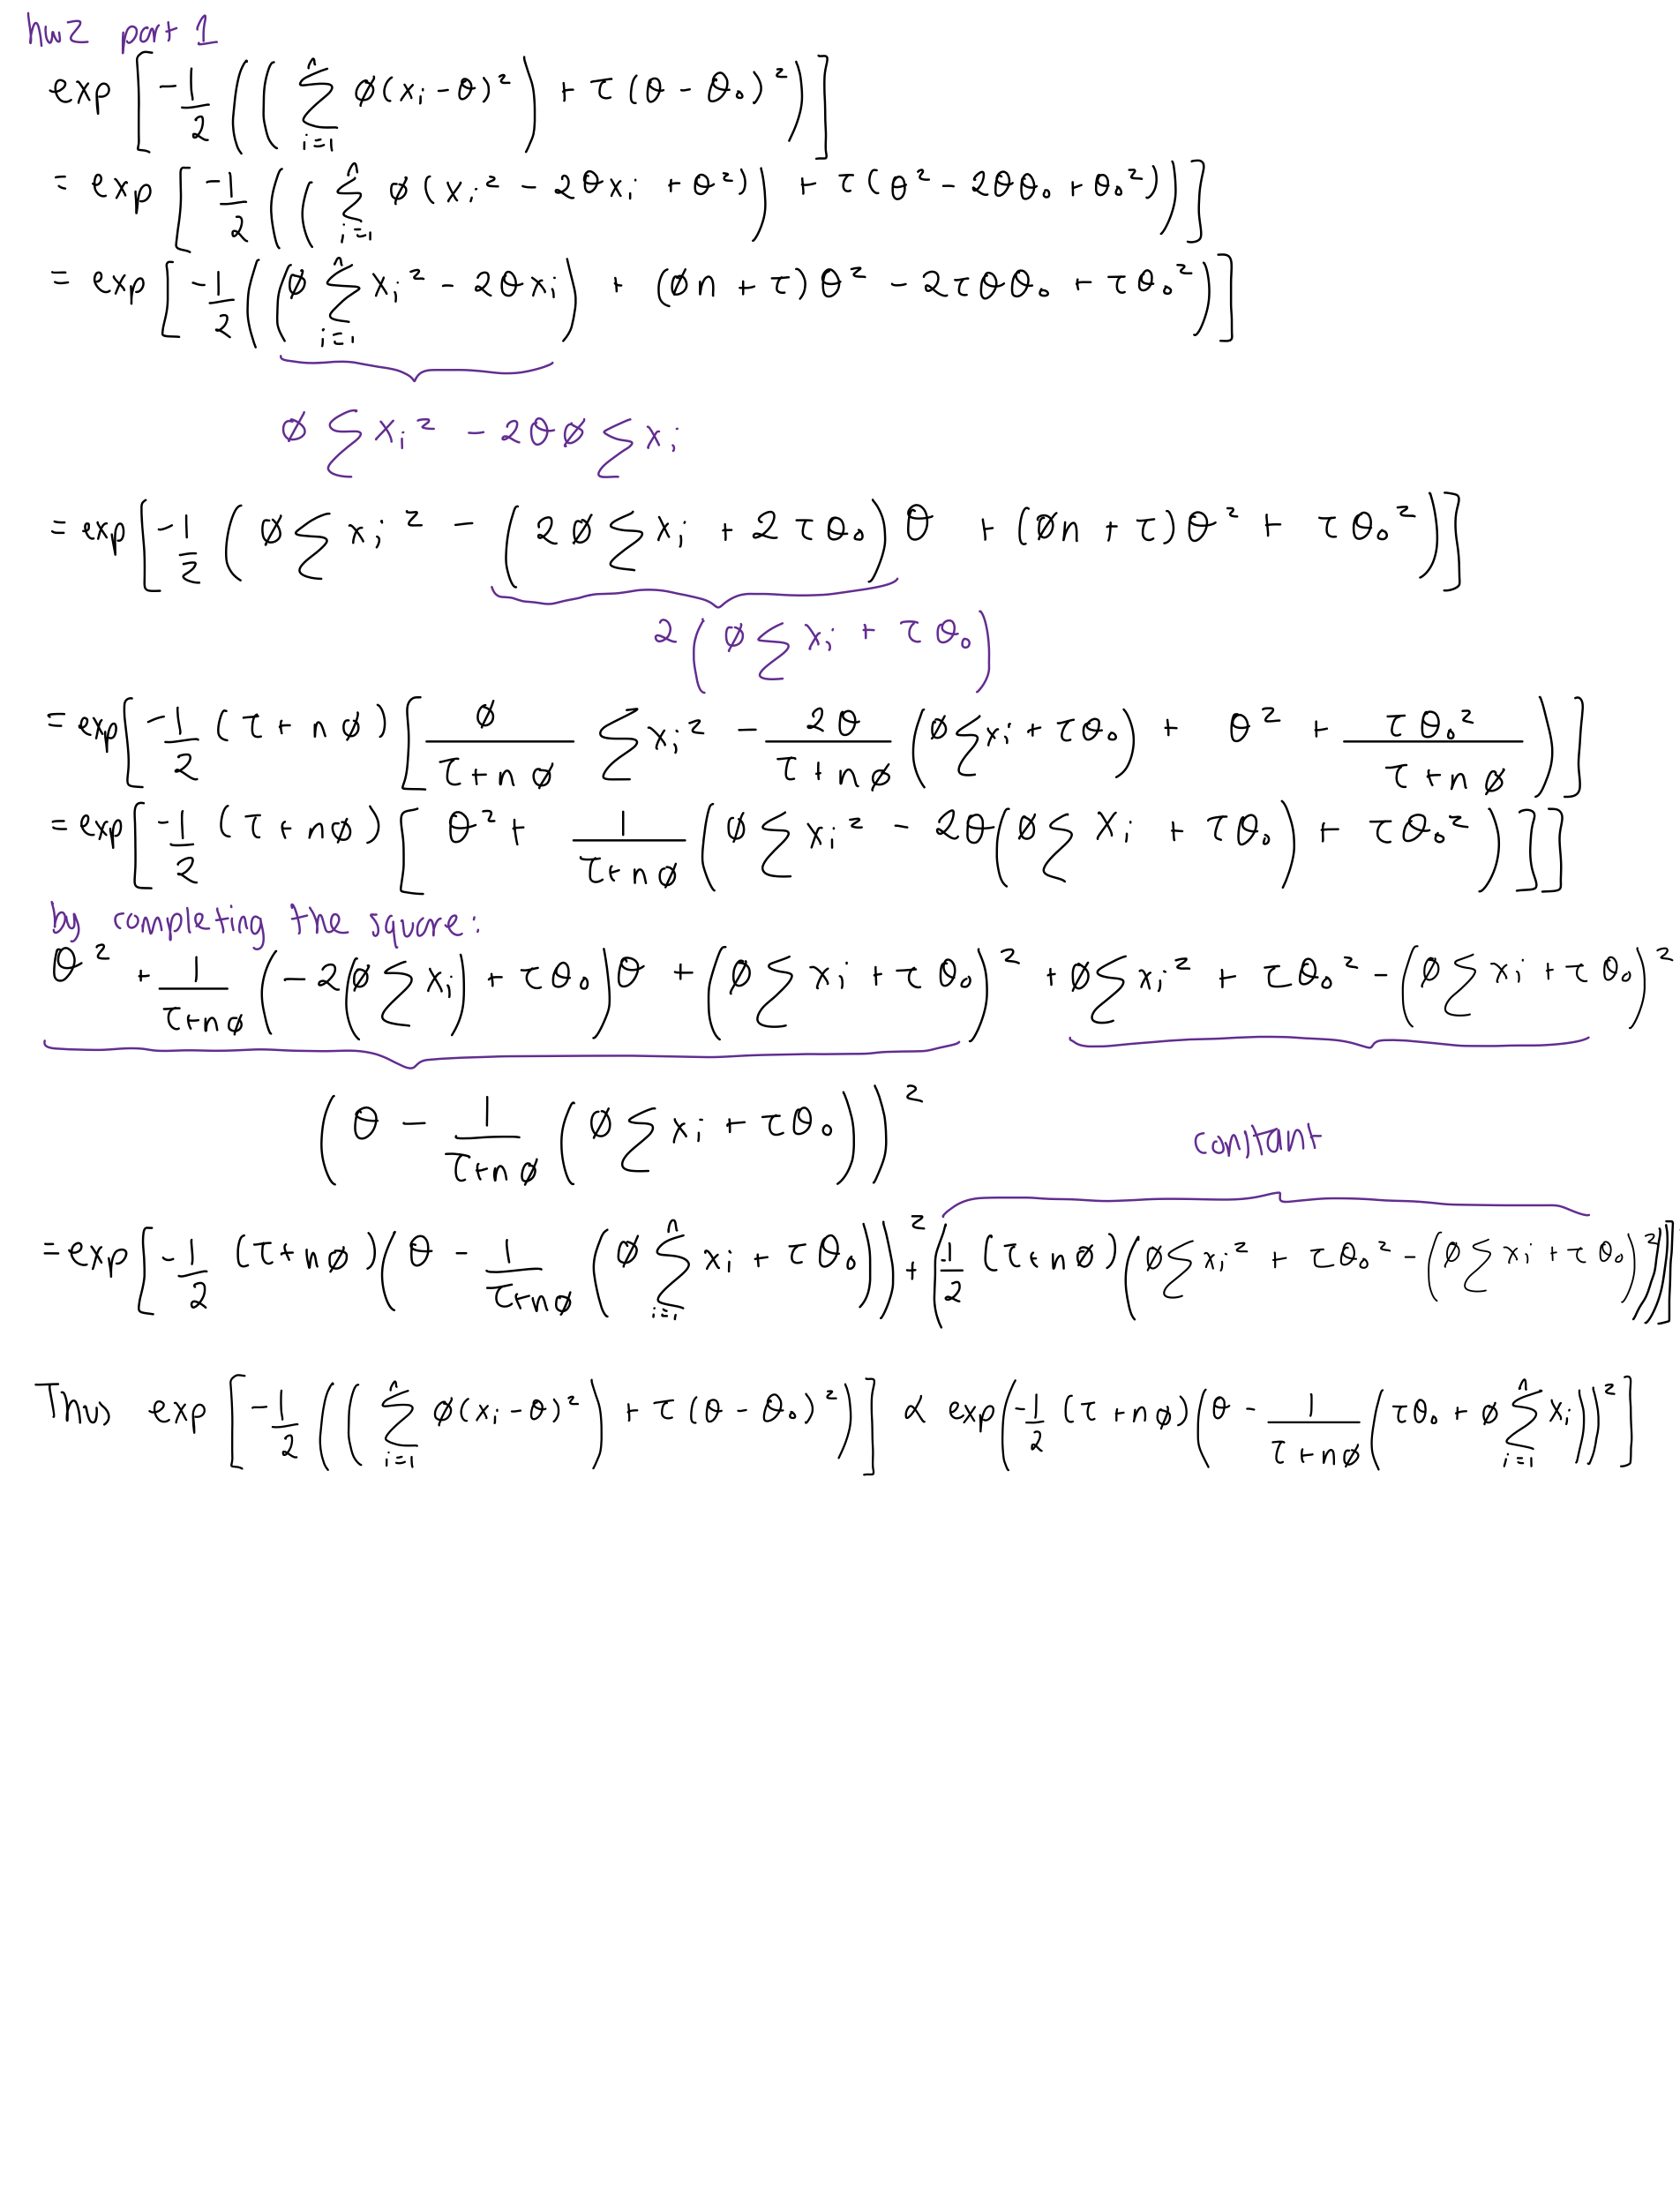

**Homework Part 2**
**Question 1**

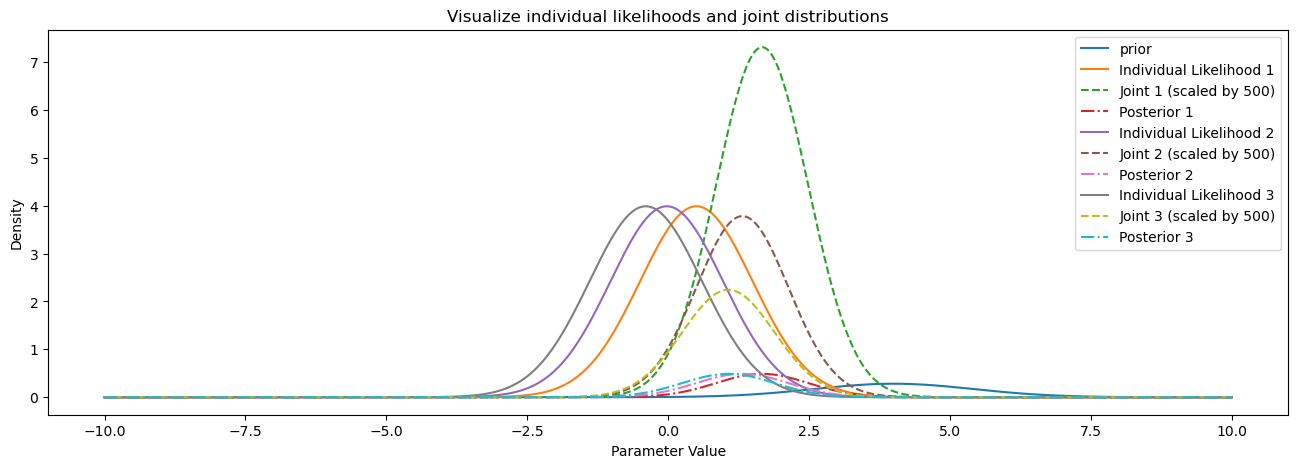

In [8]:

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n = 3
x = stats.norm(loc=0, scale=1).rvs(n)

theta_0, tau = 4, 1/2

parameter_domain = np.linspace(-10, 10, 1001)

c, c2 = 500, 10

plt.figure(figsize=(16, 5))

prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
plt.plot(parameter_domain, prior, label="prior")

for i in range(n):
    likelihood_i = stats.norm.pdf((x[i] * np.ones(parameter_domain.shape)),
                            loc=parameter_domain, scale=1)
    
    joint_i = c * likelihood_i * prior
    
    posterior = stats.norm(loc=(tau * theta_0 + x[i]) / (tau + 1), scale=1 / (tau + 1)**0.5).pdf(parameter_domain)
    
    plt.plot(parameter_domain, c2 * likelihood_i, label=f"Individual Likelihood {i+1}")
    plt.plot(parameter_domain, joint_i, linestyle="--", label=f"Joint {i+1} (scaled by {c})")
    plt.plot(parameter_domain, posterior, linestyle="-.", label=f"Posterior {i+1}")

plt.legend()
plt.title("Visualize individual likelihoods and joint distributions")
plt.xlabel("Parameter Value")
plt.ylabel("Density")
plt.show()

**Question 2**

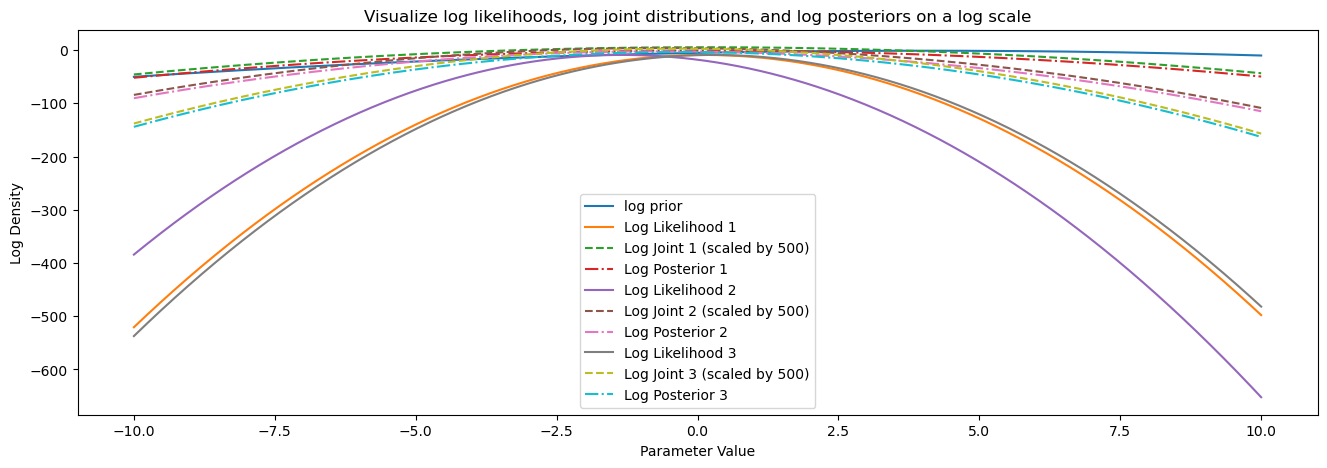

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


n = 3
x = stats.norm(loc=0, scale=1).rvs(n)

theta_0, tau = 4, 1/2

parameter_domain = np.linspace(-10, 10, 1001)

c, c2 = 500, 10

plt.figure(figsize=(16, 5))

log_prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)
plt.plot(parameter_domain, log_prior, label="log prior")

log_posterior = np.zeros_like(parameter_domain)

for i in range(n):
    log_likelihood_i = stats.norm.logpdf(x[i], loc=parameter_domain, scale=1)

    log_joint_i = np.log(c * np.exp(log_likelihood_i + log_posterior))
    
    log_posterior = np.log(np.exp(log_joint_i) / c)
    
    plt.plot(parameter_domain, c2 * log_likelihood_i, label=f"Log Likelihood {i+1}")
    plt.plot(parameter_domain, log_joint_i, linestyle="--", label=f"Log Joint {i+1} (scaled by {c})")
    plt.plot(parameter_domain, log_posterior, linestyle="-.", label=f"Log Posterior {i+1}")

plt.legend()
plt.title("Visualize log likelihoods, log joint distributions, and log posteriors on a log scale")
plt.xlabel("Parameter Value")
plt.ylabel("Log Density")
plt.show()

**Question 3**

Given the prior of a of a normal likelihood with $p(\theta) \propto 1$, we can determine the posterior distribution using Baye's theorem.  

Given: 
normal likelihood: $p(x|\theta)$
constant prior: $p(\theta) \propto 1$


$p(\theta|x) \propto p(x|\theta)p(\theta)$
$ = $p(\theta|x) \propto p(x|\theta)$

So the posterior distribution of a normal likelihood with $p(\theta) \propto 1$ is also normal. 


**Question 4**

How do log likelihoods and posteriors differ from each other as a result of improper priors pdiscussed below] and marginal likelihood constants?

Improper priors do not integrate to 1 or guarantee proper posteriors, which can make defining posteriors more difficult and leading to difficulties in calculating the marginal likelihood constants (normalizing constant). However, since log likelihoods measures the probability of observing the data given a specific set of parameters, the log likelihood itself may be well-defined and computable given an improper prior, as it involves only the likelihood term. 

The marginal likelihood is the normalizing constant that ensures the posterior distribution integrates to 1 and so with an improper prior, the marginal likelihood constant may not converge, making it undefined. However, with log likelihoods, the marginal likelihood constant cancels out when taking the log, so the log posterior can still be determined. 